In [1]:
import numpy as np
from scipy.stats import norm, lognorm
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
n = 100
mu = 5
sigma = 1
sample = norm.rvs(loc=mu, scale=sigma, size=n)

<Figure size 720x360 with 0 Axes>

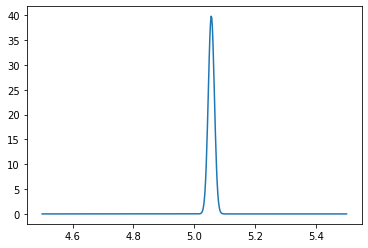

In [8]:
mu_hat = np.mean(sample)
se_hat_squared = 1/100
x_axis = np.linspace(4.5, 5.5, 500)
posterior = norm.pdf(x_axis, mu_hat, se_hat_squared)
plt.plot(x_axis, posterior)

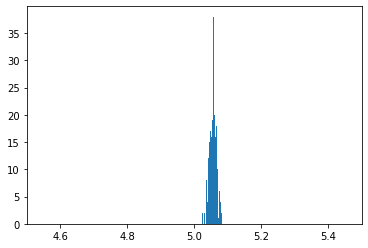

In [9]:
sample_posterior = norm.rvs(mu_hat, se_hat_squared, size = 1000)
plt.hist(sample_posterior, bins = 100)
plt.xlim(4.5,5.5)
plt.show()

In [10]:
bayesian_credible_interval = (norm.ppf(0.025, mu_hat, se_hat_squared),
                              norm.ppf(0.975, mu_hat, se_hat_squared))
bayesian_credible_interval

(5.036156244911245, 5.075355524602045)

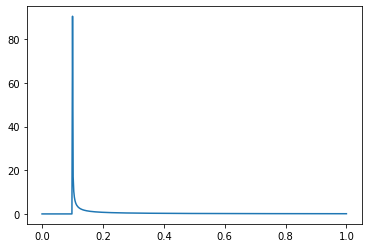

In [23]:
x_axis = np.linspace(0, 1, 500)
posterior = lognorm.pdf(x_axis, mu_hat, se_hat_squared)
plt.plot(x_axis, posterior)

Text(0.5, 0, '$\\theta$')

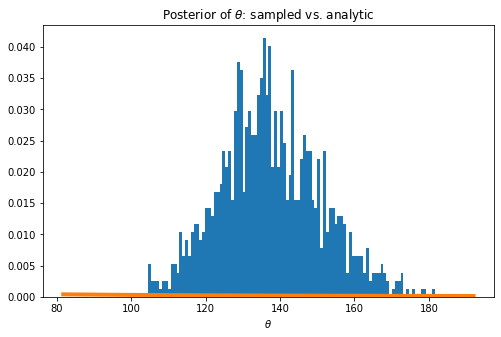

In [25]:
post_theta_med = np.exp(mu_hat)
post_theta_std = np.sqrt((np.exp(se_hat_squared**2) - 1.) \
                         * np.exp(2. * mu_hat + se_hat_squared**2))
post_theta_grid = np.linspace(post_theta_med - 4. * post_theta_std,
                              post_theta_med + 4. * post_theta_std, 1000)
post_theta_pdf = lognorm.pdf(post_theta_grid, mu_hat,
                                         scale=se_hat_squared)
post_theta_samples = np.exp(sample_posterior)

plt.figure(figsize=(1.618*5., 5.))
plt.hist(post_theta_samples, bins=100, density=True)
plt.plot(post_theta_grid, post_theta_pdf, linewidth=4)
plt.title('Posterior of $\\theta$: sampled vs. analytic')
plt.xlabel('$\\theta$')